**Movie Recommendation System Using Collaborative Filtering and K-Means**

IMPORT THE ALL NEEDABLE LIABRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.sparse import csr_matrix
from sklearn.metrics import silhouette_samples,silhouette_score
import itertools
from mpl_toolkits.axes_grid1 import make_axes_locatable 

%matplotlib inline

Import The Movies Dataset & Display The Top 5 Rows

In [ ]:
movies=pd.read_csv("drive/My Drive/Ai/movie.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Import The Rating Dataset & Display Top 5 rows

In [ ]:
rating=pd.read_csv("drive/My Drive/Ai/rating.csv")
rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


Taking only 2 lakhs Data only

In [ ]:
ratings=rating.iloc[:200000, :]

In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


Display the Last 5 rows of the Movies Dataset

In [ ]:
movies.tail()

,movieId,title,genres
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)
27277,131262,Innocence (2014),Adventure|Fantasy|Horror


Display the Last 5 rows of ratings dataset

In [ ]:
ratings.tail()

,userId,movieId,rating,timestamp
199995,1371,1261,5.0,2011-11-08 23:05:49
199996,1371,1274,4.5,2011-11-08 23:05:39
199997,1371,1291,5.0,2011-11-08 23:22:45
199998,1371,1449,4.0,2011-11-08 23:06:32
199999,1371,1693,4.5,2011-11-08 23:07:56


Display the information of Movies and Ratings dataset

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     200000 non-null  int64  
 1   movieId    200000 non-null  int64  
 2   rating     200000 non-null  float64
 3   timestamp  200000 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 6.1+ MB


Display the missing values of dataset

In [ ]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [ ]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Rows & columns of Movies dataset

In [ ]:
movies.shape

(27278, 3)

Rows & columns of Ratings dataset

In [ ]:
ratings.shape

(200000, 4)

Calculate The Genre Based Ratings

In [ ]:
def get_genre_ratings(ratings, movies, genres, column_names):
    genre_ratings = pd.DataFrame()
    for genre in genres:        
        genre_movies = movies[movies['genres'].str.contains(genre) ]
        avg_genre_votes_per_user = ratings[ratings['movieId'].isin(genre_movies['movieId'])].loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean().round(2)
        
        genre_ratings = pd.concat([genre_ratings, avg_genre_votes_per_user], axis=1)
        
    genre_ratings.columns = column_names
    return genre_ratings

genre_ratings = get_genre_ratings(ratings, movies, ['Romance', 'Sci-Fi'], ['Avg_romance_rating', 'Avg_scifi_rating'])
genre_ratings.head()

,Avg_romance_rating,Avg_scifi_rating
1,3.95,3.71
2,3.83,4.61
3,4.06,4.00
4,3.50,3.00
5,3.94,4.60


In [ ]:
genre_ratings.shape

(1371, 2)

Take Only For above 3 rated movies for genres

In [ ]:
def best_genre_rating_dataset(genre_ratings, score_limit_1, score_limit_2):
    best_dataset =    genre_ratings[((genre_ratings['Avg_romance_rating'] < score_limit_1 - 0.2) & (genre_ratings['Avg_scifi_rating'] > score_limit_2)) | ((genre_ratings['Avg_scifi_rating'] < score_limit_1) & (genre_ratings['Avg_romance_rating'] > score_limit_2))]
    best_dataset = pd.concat([best_dataset[:702], genre_ratings[:2]])
    best_dataset = pd.DataFrame(best_dataset.to_records())
    return best_dataset

In [ ]:
best_dataset = best_genre_rating_dataset(genre_ratings, 3.2, 2.5)

In [ ]:
best_dataset.shape

(432, 3)

Display the above 3 rated dataset

In [ ]:
best_dataset.head()

,index,Avg_romance_rating,Avg_scifi_rating
0,4,3.50,3.00
1,8,3.95,3.18
2,9,4.00,2.67
3,15,3.33,3.00
4,18,3.88,2.45


In [ ]:
best_dataset.tail()

,index,Avg_romance_rating,Avg_scifi_rating
427,1362,4.28,2.50
428,1364,3.34,3.13
429,1369,3.49,3.09
430,1,3.95,3.71
431,2,3.83,4.61


In [ ]:
best_dataset.rename(columns={'index':'userId'},inplace=True)

In [ ]:
best_dataset.head()

,userId,Avg_romance_rating,Avg_scifi_rating
0,4,3.50,3.00
1,8,3.95,3.18
2,9,4.00,2.67
3,15,3.33,3.00
4,18,3.88,2.45


Display the Initial Cluster 

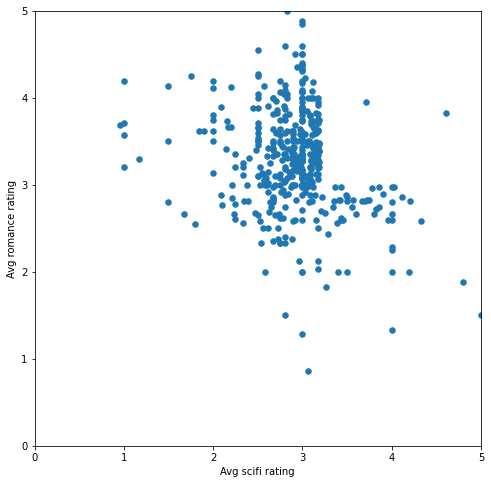

In [ ]:
def draw_scatterplot(x_data, x_label, y_data, y_label):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.scatter(x_data, y_data, s=30)
# Plot the scatterplot
draw_scatterplot(best_dataset['Avg_scifi_rating'],'Avg scifi rating', best_dataset['Avg_romance_rating'], 'Avg romance rating')

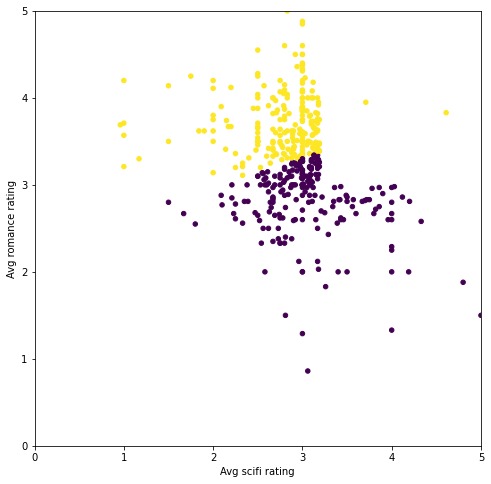

In [ ]:
# Let's turn our dataset into a list
X = best_dataset[['Avg_scifi_rating','Avg_romance_rating']].values

# Import KMeans
from sklearn.cluster import KMeans

# Create an instance of KMeans to find two clusters
kmeans_2 = KMeans(n_clusters=2)

# Use fit_predict to cluster the dataset
predictions = kmeans_2.fit_predict(X)

# Defining the cluster plotting function
def draw_clusters(best_dataset, predictions, cmap='viridis'):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel('Avg scifi rating')
    ax.set_ylabel('Avg romance rating')
    clustered = pd.concat([best_dataset.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
    plt.scatter(clustered['Avg_scifi_rating'], clustered['Avg_romance_rating'], c=clustered['group'], s=20, cmap=cmap)

# Plot
draw_clusters(best_dataset, predictions)

Find The Optimal K using Elbow Method

In [ ]:
sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    best_dataset["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

Display the Optimal K plot

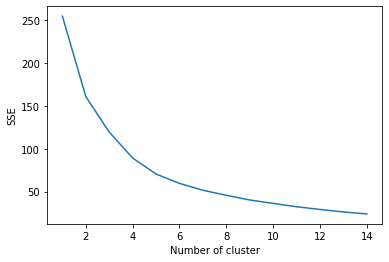

In [ ]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

Silhouette Method Using Find Optimal K Value

In [ ]:
for n_cluster in range(2, 15):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.34319264631605945
For n_clusters=3, The Silhouette Coefficient is 0.3472401702342571
For n_clusters=4, The Silhouette Coefficient is 0.3762261237073798
For n_clusters=5, The Silhouette Coefficient is 0.3979720401051306
For n_clusters=6, The Silhouette Coefficient is 0.39757917151714356
For n_clusters=7, The Silhouette Coefficient is 0.34647417582503093
For n_clusters=8, The Silhouette Coefficient is 0.3517175512770122
For n_clusters=9, The Silhouette Coefficient is 0.3643569347527321
For n_clusters=10, The Silhouette Coefficient is 0.36904807957882313
For n_clusters=11, The Silhouette Coefficient is 0.37195478447807057
For n_clusters=12, The Silhouette Coefficient is 0.3667028287560942
For n_clusters=13, The Silhouette Coefficient is 0.3726684247850386
For n_clusters=14, The Silhouette Coefficient is 0.3817598821922288


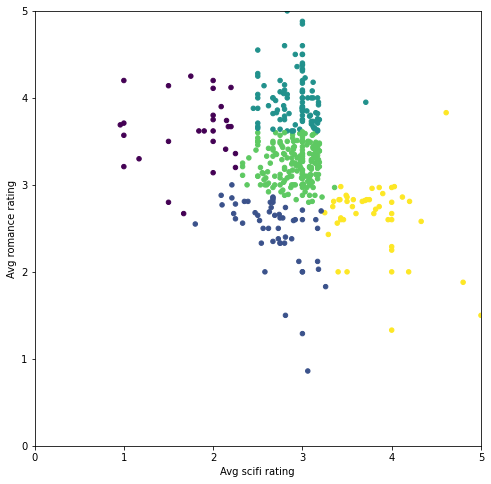

In [ ]:
# Optimal Cluster value 5
kmeans_5 = KMeans(n_clusters=5)
# Use fit_predict to cluster the dataset
predictions_5 = kmeans_5.fit_predict(X)
# Plot
draw_clusters(best_dataset, predictions_5)

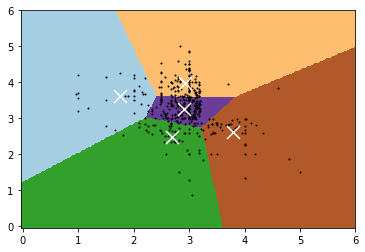

In [ ]:
h = .02 
# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans_5.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

centroids=kmeans_5.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1],marker="x",s=169,linewidths=5,color="w",zorder=10)
x_min, x_max=X[:,0].min()-1, X[:,0].max()+1
y_min, y_max=X[:,0].min()-1, X[:,0].max()+1
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

Add the Action Genres 

In [ ]:
# Select our best dataset and add action genre
best_dataset_3_genres = get_genre_ratings(rating, movies, ['Romance','Sci-Fi', 'Action'],['Avg_romance_rating', 'Avg_scifi_rating', 'Avg_action_rating'])
# Drop null values
best_dataset_3_genres = best_genre_rating_dataset(best_dataset_3_genres, 3.2, 2.5).dropna()
# Print the number of records and the head of our dataset
print( "Number of records: ", len(best_dataset_3_genres))
best_dataset_3_genres.head()

Number of records:  702


,index,Avg_romance_rating,Avg_scifi_rating,Avg_action_rating
0,4,3.50,3.00,3.54
1,8,3.95,3.18,3.63
2,9,4.00,2.67,3.20
3,15,3.33,3.00,2.73
4,18,3.88,2.45,2.54


In [ ]:
best_dataset_3_genres.rename(columns={'index':'userId'},inplace=True)

In [ ]:
best_dataset_3_genres.head()

,userId,Avg_romance_rating,Avg_scifi_rating,Avg_action_rating
0,4,3.50,3.00,3.54
1,8,3.95,3.18,3.63
2,9,4.00,2.67,3.20
3,15,3.33,3.00,2.73
4,18,3.88,2.45,2.54


Cluster Evaluation Method - Using DB-Index

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

kmeans = KMeans(n_clusters=5,max_iter=1000,random_state=10).fit(best_dataset_3_genres)
  
# we store the cluster labels
labels = kmeans.labels_
  
print(davies_bouldin_score(best_dataset_3_genres, labels))


0.4991045608232513


In [ ]:
from sklearn.metrics import davies_bouldin_score
db={}
for K in range(2,10):
  kmeans1=KMeans(n_clusters=K,max_iter=1000,random_state=10).fit(best_dataset_3_genres)
  clusters=kmeans1.labels_
  db[K]=davies_bouldin_score(best_dataset_3_genres,clusters)

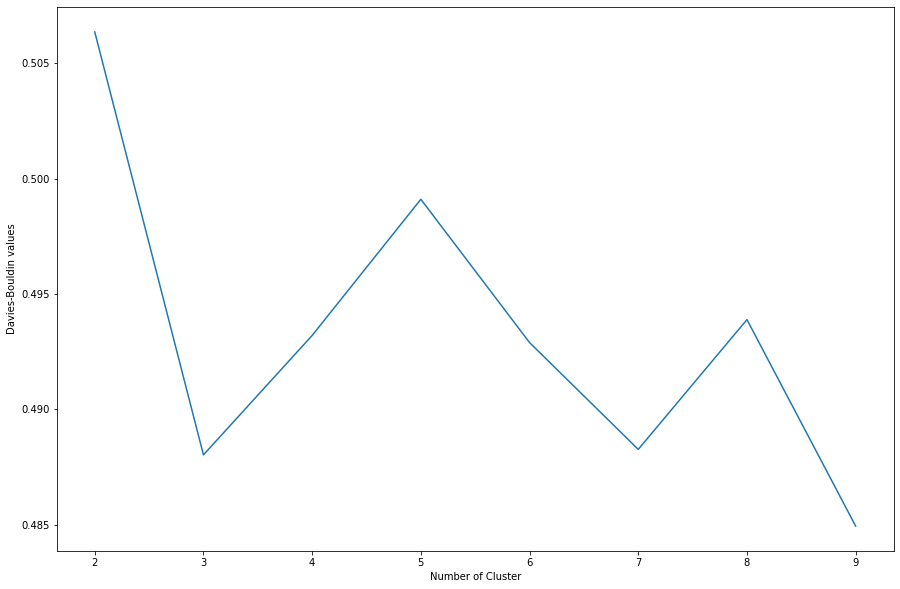

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(list(db.keys()),list(db.values()))
plt.xlabel("Number of Cluster")
plt.ylabel("Davies-Bouldin values")
plt.show()

Merge The Movies & Ratings dataset

In [ ]:
# Merge the two tables then pivot so we have Users X Movies dataframe
ratings_title = pd.merge(ratings, movies[['movieId', 'title']], on='movieId' )
user_movie_ratings = pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')
# Print he number of dimensions and a subset of the dataset
print('dataset dimensions: ',
      user_movie_ratings.shape, '\n\nSubset example:' )
user_movie_ratings.iloc[:6, :10]

dataset dimensions:  (1371, 10151) 

Subset example:


title,'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),(Untitled) (2009),*batteries not included (1987)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Display Top 5 rows of the User Ratings dataset

In [ ]:
user_movie_ratings.head()

title,'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),(Untitled) (2009),*batteries not included (1987),"...All the Marbles (California Dolls, The) (1981)",...And Justice for All (1979),.45 (2006),1-900 (06) (1994),10 (1979),10 Items or Less (2006),10 Things I Hate About You (1999),10 Years (2011),10 to Midnight (1983),"10,000 BC (2008)",100 Feet (2008),100 Girls (2000),100 Rifles (1969),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),10th & Wolf (2006),"10th Kingdom, The (2000)","11'09\\""01 - September 11 (2002)""",11:14 (2003),"11th Hour, The (2007)",12 (2007),12 Angry Men (1957),12 Angry Men (1997),12 Rounds (2009),12 Years a Slave (2013),127 Hours (2010),12:01 (1993),13 Assassins (Jûsan-nin no shikaku) (2010),...,Zandalee (1991),Zapped! (1982),Zardoz (1974),Zathura (2005),Zazie dans le métro (1960),"Zed & Two Noughts, A (1985)",Zeitgeist: Addendum (2008),Zeitgeist: The Movie (2007),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zero Day (2002),Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zero de conduite (Zero for Conduct) (Zéro de conduite: Jeunes diables au collège) (1933),Zeus and Roxanne (1997),Ziggy Stardust and the Spiders from Mars (1973),Zodiac (2007),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),Zombie Holocaust (a.k.a. Doctor Butcher M.D.) (Zombi Holocaust) (1980),"Zombie Lake (Lac des morts vivants, Le) (Zombies Lake) (Lake of the Living Dead, The) (1981)",Zombie Strippers! (2008),Zombieland (2009),Zookeeper (2011),Zoolander (2001),Zoom (2006),Zoot Suit (1981),Zorba the Greek (Alexis Zorbas) (1964),Zorro (1975),"Zorro, the Gay Blade (1981)",Zulu (1964),Zulu Dawn (1979),Zus & Zo (2001),[REC] (2007),"\\""Great Performances\""\"" Cats (1998)""",eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
user_movie_ratings.tail()

title,'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),(Untitled) (2009),*batteries not included (1987),"...All the Marbles (California Dolls, The) (1981)",...And Justice for All (1979),.45 (2006),1-900 (06) (1994),10 (1979),10 Items or Less (2006),10 Things I Hate About You (1999),10 Years (2011),10 to Midnight (1983),"10,000 BC (2008)",100 Feet (2008),100 Girls (2000),100 Rifles (1969),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),10th & Wolf (2006),"10th Kingdom, The (2000)","11'09\\""01 - September 11 (2002)""",11:14 (2003),"11th Hour, The (2007)",12 (2007),12 Angry Men (1957),12 Angry Men (1997),12 Rounds (2009),12 Years a Slave (2013),127 Hours (2010),12:01 (1993),13 Assassins (Jûsan-nin no shikaku) (2010),...,Zandalee (1991),Zapped! (1982),Zardoz (1974),Zathura (2005),Zazie dans le métro (1960),"Zed & Two Noughts, A (1985)",Zeitgeist: Addendum (2008),Zeitgeist: The Movie (2007),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zero Day (2002),Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zero de conduite (Zero for Conduct) (Zéro de conduite: Jeunes diables au collège) (1933),Zeus and Roxanne (1997),Ziggy Stardust and the Spiders from Mars (1973),Zodiac (2007),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),Zombie Holocaust (a.k.a. Doctor Butcher M.D.) (Zombi Holocaust) (1980),"Zombie Lake (Lac des morts vivants, Le) (Zombies Lake) (Lake of the Living Dead, The) (1981)",Zombie Strippers! (2008),Zombieland (2009),Zookeeper (2011),Zoolander (2001),Zoom (2006),Zoot Suit (1981),Zorba the Greek (Alexis Zorbas) (1964),Zorro (1975),"Zorro, the Gay Blade (1981)",Zulu (1964),Zulu Dawn (1979),Zus & Zo (2001),[REC] (2007),"\\""Great Performances\""\"" Cats (1998)""",eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
user_movie_ratings.isnull().sum()

title
'Hellboy': The Seeds of Creation (2004)      1370
'Neath the Arizona Skies (1934)              1370
'Round Midnight (1986)                       1369
'Salem's Lot (2004)                          1369
'Til There Was You (1997)                    1363
                                             ... 
eXistenZ (1999)                              1313
xXx (2002)                                   1329
xXx: State of the Union (2005)               1363
¡Three Amigos! (1986)                        1309
À nous la liberté (Freedom for Us) (1931)    1370
Length: 10151, dtype: int64

In [ ]:
user_movie_ratings.shape

(1371, 10151)

Calculate the Most rated Movies

In [ ]:
def get_most_rated_movies(user_movie_ratings, max_number_of_movies):
    # 1- Count
    user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)

    # 2- sort
    user_movie_ratings_sorted = user_movie_ratings.sort_values(len(user_movie_ratings)-1, axis=1, ascending=False)
    user_movie_ratings_sorted = user_movie_ratings_sorted.drop(user_movie_ratings_sorted.tail(1).index)
    
    # 3- slice
    most_rated_movies = user_movie_ratings_sorted.iloc[:, :max_number_of_movies]
    return most_rated_movies

Calculate the Most Rated Users

In [ ]:
def get_users_who_rate_the_most(most_rated_movies, max_number_of_movies):
    # Get most voting users
    # 1- Count
    most_rated_movies['counts'] = pd.Series(most_rated_movies.count(axis=1))

    # 2- Sort
    most_rated_movies_users = most_rated_movies.sort_values('counts', ascending=False)
    
    # 3- Slice
    most_rated_movies_users_selection = most_rated_movies_users.iloc[:max_number_of_movies, :]
    most_rated_movies_users_selection = most_rated_movies_users_selection.drop(['counts'], axis=1)
    
    return most_rated_movies_users_selection

Sort the Movie Ratings 

In [ ]:
def sort_by_rating_density(user_movie_ratings, n_movies, n_users):
    most_rated_movies = get_most_rated_movies(user_movie_ratings, n_movies)
    most_rated_movies = get_users_who_rate_the_most(most_rated_movies, n_users)
    return most_rated_movies

Define the Number of Movies and Users

In [ ]:
n_movies = 50
n_users = 20
most_rated_movies_users_selection = sort_by_rating_density(user_movie_ratings, n_movies, n_users)
print(most_rated_movies_users_selection.shape)
most_rated_movies_users_selection.head()

(20, 50)


title,Pulp Fiction (1994),Forrest Gump (1994),"Silence of the Lambs, The (1991)","Shawshank Redemption, The (1994)",Jurassic Park (1993),Star Wars: Episode IV - A New Hope (1977),Braveheart (1995),"Matrix, The (1999)",Terminator 2: Judgment Day (1991),Schindler's List (1993),"Fugitive, The (1993)",Toy Story (1995),"Usual Suspects, The (1995)",Star Wars: Episode VI - Return of the Jedi (1983),American Beauty (1999),Apollo 13 (1995),Star Wars: Episode V - The Empire Strikes Back (1980),Independence Day (a.k.a. ID4) (1996),Batman (1989),Fargo (1996),Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),Dances with Wolves (1990),Seven (a.k.a. Se7en) (1995),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),True Lies (1994),Aladdin (1992),Back to the Future (1985),Fight Club (1999),"Godfather, The (1972)",Speed (1994),"Sixth Sense, The (1999)",Ace Ventura: Pet Detective (1994),"Lion King, The (1994)",Saving Private Ryan (1998),"Lord of the Rings: The Fellowship of the Ring, The (2001)",Mission: Impossible (1996),Men in Black (a.k.a. MIB) (1997),"Lord of the Rings: The Two Towers, The (2002)","Mask, The (1994)",Pretty Woman (1990),Monty Python and the Holy Grail (1975),"Princess Bride, The (1987)",Mrs. Doubtfire (1993),Beauty and the Beast (1991),"Terminator, The (1984)",Indiana Jones and the Last Crusade (1989),Shrek (2001),Memento (2000),Babe (1995),Die Hard: With a Vengeance (1995)
774,5.0,4.0,5.0,4.0,4.5,5.0,5.0,4.5,4.5,5.0,4.0,4.5,4.0,4.5,3.5,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.5,4.0,3.5,3.0,5.0,5.0,4.5,3.5,4.0,2.5,4.0,4.0,4.5,2.0,4.0,5.0,3.0,2.0,4.0,4.5,3.0,3.5,4.0,5.0,3.0,4.0,4.0,4.5
981,5.0,2.5,3.5,4.5,3.0,4.0,3.0,3.5,3.5,3.5,3.0,3.0,4.0,3.5,4.0,3.0,4.0,2.5,3.0,4.0,4.0,3.0,5.0,3.5,2.5,3.0,3.5,5.0,4.5,3.5,3.5,3.5,3.5,3.5,4.0,2.5,3.0,4.0,2.5,3.0,4.0,NaN,3.0,3.5,4.0,4.0,3.0,4.0,2.5,3.0
740,5.0,5.0,5.0,5.0,2.0,5.0,4.5,4.5,3.5,5.0,4.0,5.0,5.0,4.0,5.0,5.0,4.5,0.5,5.0,5.0,4.5,3.0,5.0,5.0,1.0,4.0,2.5,5.0,5.0,2.5,4.5,1.0,4.5,5.0,5.0,3.0,4.5,5.0,4.5,2.5,5.0,5.0,4.5,3.5,4.5,5.0,5.0,4.5,1.0,NaN
426,4.0,1.5,4.5,4.0,2.0,0.5,2.0,3.0,4.0,3.0,2.5,4.0,4.0,0.5,4.0,1.5,0.5,1.5,3.5,4.0,2.0,2.5,5.0,4.5,2.5,2.0,4.0,4.5,5.0,3.0,3.0,2.5,2.0,3.0,2.0,3.0,2.0,2.0,2.5,1.0,5.0,NaN,1.0,3.0,5.0,1.5,2.0,2.5,3.0,3.0
207,5.0,1.0,4.5,4.5,4.5,4.5,3.5,3.0,2.5,4.5,5.0,4.0,4.5,4.0,3.5,5.0,4.0,4.0,3.0,4.0,5.0,2.0,3.5,3.0,3.5,4.5,4.0,4.0,5.0,2.0,3.0,3.0,3.5,4.0,4.0,0.5,1.5,4.0,3.5,0.5,4.5,4.0,NaN,4.0,4.0,4.0,4.0,4.5,4.5,3.5


Display the rows & columns of most rated movies and users

In [ ]:
most_rated_movies_users_selection.shape

(20, 50)

In [ ]:
most_rated_movies_users_selection.tail()

title,Pulp Fiction (1994),Forrest Gump (1994),"Silence of the Lambs, The (1991)","Shawshank Redemption, The (1994)",Jurassic Park (1993),Star Wars: Episode IV - A New Hope (1977),Braveheart (1995),"Matrix, The (1999)",Terminator 2: Judgment Day (1991),Schindler's List (1993),"Fugitive, The (1993)",Toy Story (1995),"Usual Suspects, The (1995)",Star Wars: Episode VI - Return of the Jedi (1983),American Beauty (1999),Apollo 13 (1995),Star Wars: Episode V - The Empire Strikes Back (1980),Independence Day (a.k.a. ID4) (1996),Batman (1989),Fargo (1996),Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),Dances with Wolves (1990),Seven (a.k.a. Se7en) (1995),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),True Lies (1994),Aladdin (1992),Back to the Future (1985),Fight Club (1999),"Godfather, The (1972)",Speed (1994),"Sixth Sense, The (1999)",Ace Ventura: Pet Detective (1994),"Lion King, The (1994)",Saving Private Ryan (1998),"Lord of the Rings: The Fellowship of the Ring, The (2001)",Mission: Impossible (1996),Men in Black (a.k.a. MIB) (1997),"Lord of the Rings: The Two Towers, The (2002)","Mask, The (1994)",Pretty Woman (1990),Monty Python and the Holy Grail (1975),"Princess Bride, The (1987)",Mrs. Doubtfire (1993),Beauty and the Beast (1991),"Terminator, The (1984)",Indiana Jones and the Last Crusade (1989),Shrek (2001),Memento (2000),Babe (1995),Die Hard: With a Vengeance (1995)
491,4.0,3.0,3.5,4.5,3.0,3.0,5.0,4.5,4.5,3.5,NaN,3.5,NaN,4.0,4.5,2.0,4.0,1.5,4.0,NaN,4.0,2.5,4.0,4.5,3.0,4.5,4.0,3.5,4.0,1.0,4.0,4.5,4.0,0.5,4.5,3.5,3.5,4.5,4.5,1.5,5.0,4.0,1.5,2.5,4.5,4.0,4.5,4.5,2.5,3.5
1184,4.0,4.5,5.0,5.0,4.0,4.5,5.0,4.0,3.5,NaN,4.0,3.5,5.0,3.5,4.5,4.0,4.5,3.5,4.0,4.0,4.5,4.0,4.5,NaN,3.5,4.5,4.0,4.0,5.0,3.5,4.5,4.5,4.0,4.0,4.0,4.0,3.5,4.0,3.5,3.5,4.0,4.5,4.0,4.0,4.0,4.0,4.0,4.0,NaN,4.0
1199,5.0,5.0,5.0,5.0,3.5,5.0,3.0,5.0,5.0,5.0,4.0,3.5,5.0,5.0,4.5,4.0,5.0,3.0,4.0,4.5,4.5,3.5,5.0,4.0,3.5,NaN,3.0,5.0,4.5,3.0,4.0,2.5,3.5,4.0,5.0,4.0,4.0,5.0,3.0,3.5,4.0,NaN,3.0,NaN,4.5,4.0,4.5,5.0,3.0,3.5
115,4.5,4.0,3.0,4.5,4.0,4.5,4.5,4.0,4.0,4.0,3.0,3.0,4.5,5.0,4.5,3.0,4.5,1.0,4.5,4.0,4.0,NaN,4.5,4.0,3.0,3.0,3.5,5.0,4.5,1.0,3.0,3.5,4.0,5.0,3.5,2.5,2.5,3.5,1.0,NaN,4.0,NaN,3.5,2.0,2.0,3.5,3.0,NaN,2.0,5.0
909,4.5,4.0,4.0,4.0,4.0,4.5,4.0,2.0,NaN,3.5,3.5,5.0,NaN,4.0,4.0,4.5,3.5,4.5,4.0,4.5,5.0,4.5,NaN,4.0,4.0,4.0,4.0,4.0,5.0,3.5,4.5,4.0,3.0,5.0,4.5,3.5,4.5,4.5,3.5,3.0,4.5,5.0,4.0,4.0,4.5,4.5,4.5,NaN,3.0,4.5


In [ ]:
most_rated_movies_users_selection.isnull().sum()

title
Pulp Fiction (1994)                                                               0
Forrest Gump (1994)                                                               0
Silence of the Lambs, The (1991)                                                  0
Shawshank Redemption, The (1994)                                                  0
Jurassic Park (1993)                                                              0
Star Wars: Episode IV - A New Hope (1977)                                         0
Braveheart (1995)                                                                 0
Matrix, The (1999)                                                                0
Terminator 2: Judgment Day (1991)                                                 1
Schindler's List (1993)                                                           3
Fugitive, The (1993)                                                              1
Toy Story (1995)                                                      

In [ ]:
def draw_movies_heatmap(most_rated_movies_users_selection, axis_labels=True):
    
    fig = plt.figure(figsize=(15,4))
    ax = plt.gca()
    
    # Draw heatmap
    heatmap = ax.imshow(most_rated_movies_users_selection,  interpolation='nearest', vmin=0, vmax=5, aspect='auto')
    if axis_labels:
        ax.set_yticks(np.arange(most_rated_movies_users_selection.shape[0]) , minor=False)
        ax.set_xticks(np.arange(most_rated_movies_users_selection.shape[1]) , minor=False)
        ax.invert_yaxis()
        ax.xaxis.tick_top()
        labels = most_rated_movies_users_selection.columns.str[:200]
        ax.set_xticklabels(labels, minor=False)
        ax.set_yticklabels(most_rated_movies_users_selection.index, minor=False)
        plt.setp(ax.get_xticklabels(), rotation=90)
    else:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
        ax.grid(False)
        ax.set_ylabel('User id')
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar = fig.colorbar(heatmap, ticks=[5, 4, 3, 2, 1, 0], cax=cax)
        cbar.ax.set_yticklabels(['5 stars', '4 stars','3 stars','2 stars','1 stars','0 stars'])
        plt.show()


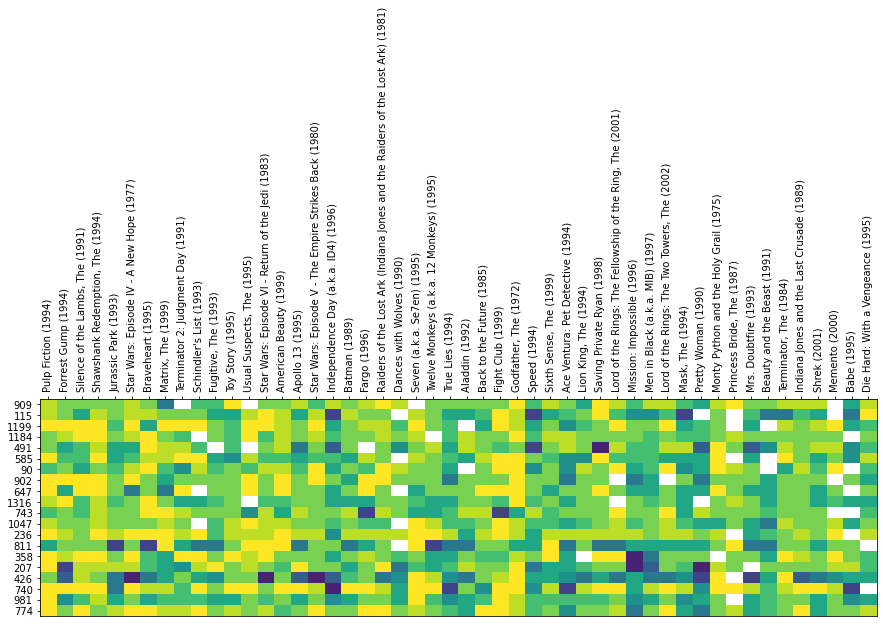

In [ ]:
draw_movies_heatmap(most_rated_movies_users_selection)

In [ ]:
# Define Function to get the most rated movies
def get_most_rated_movies(user_movie_ratings, max_number_of_movies):
    
    # 1- Count
    user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)
    
    # 2- sort
    user_movie_ratings_sorted = user_movie_ratings.sort_values(len(user_movie_ratings)-1, axis=1, ascending=False)
    user_movie_ratings_sorted = user_movie_ratings_sorted.drop(user_movie_ratings_sorted.tail(1).index)
    
    # 3- slice
    most_rated_movies = user_movie_ratings_sorted.iloc[:, :max_number_of_movies]
    return most_rated_movies

Calculate Most rated first 500 movies

In [ ]:
user_movie_ratings =  pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')
most_rated_movies_500 = get_most_rated_movies(user_movie_ratings, 500)

In [ ]:
most_rated_movies_500.shape

(1371, 500)

In [ ]:
most_rated_movies_500.head()

title,Pulp Fiction (1994),Forrest Gump (1994),"Silence of the Lambs, The (1991)","Shawshank Redemption, The (1994)",Jurassic Park (1993),Star Wars: Episode IV - A New Hope (1977),Braveheart (1995),"Matrix, The (1999)",Terminator 2: Judgment Day (1991),Schindler's List (1993),"Fugitive, The (1993)",Toy Story (1995),"Usual Suspects, The (1995)",Star Wars: Episode VI - Return of the Jedi (1983),American Beauty (1999),Apollo 13 (1995),Star Wars: Episode V - The Empire Strikes Back (1980),Independence Day (a.k.a. ID4) (1996),Batman (1989),Fargo (1996),Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),Dances with Wolves (1990),Seven (a.k.a. Se7en) (1995),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),True Lies (1994),Aladdin (1992),Back to the Future (1985),Fight Club (1999),"Godfather, The (1972)",Speed (1994),"Sixth Sense, The (1999)",Ace Ventura: Pet Detective (1994),"Lion King, The (1994)",Saving Private Ryan (1998),"Lord of the Rings: The Fellowship of the Ring, The (2001)",Mission: Impossible (1996),Men in Black (a.k.a. MIB) (1997),"Lord of the Rings: The Two Towers, The (2002)","Mask, The (1994)",Pretty Woman (1990),...,"League of Their Own, A (1992)",Gone in 60 Seconds (2000),"Ring, The (2002)",Beverly Hills Cop (1984),Singin' in the Rain (1952),Cinema Paradiso (Nuovo cinema Paradiso) (1989),Lethal Weapon 3 (1992),"Gods Must Be Crazy, The (1980)",Pi (1998),"Adventures of Priscilla, Queen of the Desert, The (1994)",Say Anything... (1989),"Negotiator, The (1998)","People vs. Larry Flynt, The (1996)",Signs (2002),Ronin (1998),Juno (2007),Sleepers (1996),School of Rock (2003),Willow (1988),Harry Potter and the Goblet of Fire (2005),Analyze This (1999),Mad Max (1979),Bowfinger (1999),"Nightmare on Elm Street, A (1984)","Femme Nikita, La (Nikita) (1990)",No Country for Old Men (2007),Lady and the Tramp (1955),Best in Show (2000),Lethal Weapon 4 (1998),"Italian Job, The (2003)",My Best Friend's Wedding (1997),Heavy Metal (1981),10 Things I Hate About You (1999),Star Trek: The Motion Picture (1979),Miracle on 34th Street (1994),Poltergeist (1982),Inglourious Basterds (2009),Big Daddy (1999),Black Hawk Down (2001),William Shakespeare's Romeo + Juliet (1996)
0,4.0,NaN,3.5,4.0,NaN,4.0,NaN,NaN,3.5,NaN,NaN,NaN,3.5,NaN,NaN,NaN,4.5,NaN,NaN,NaN,4.5,NaN,3.5,3.5,NaN,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,5.0,3.5,NaN,...,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,5.0,5.0,4.0,NaN,5.0,NaN,NaN,NaN,NaN,5.0,3.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5.0,5.0,5.0,5.0,NaN,5.0,4.0,NaN,5.0,4.0,5.0,5.0,NaN,NaN,5.0,3.0,NaN,NaN,5.0,NaN,NaN,4.0,NaN,NaN,5.0,NaN,5.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
3,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3.0,5.0,4.0,5.0,4.0,NaN,5.0,NaN,5.0,NaN,NaN,5.0,NaN,5.0,5.0,5.0,NaN,3.0,5.0,5.0,NaN,NaN,5.0,5.0,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,3.0,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Remove missing values using preprocessing techniques

In [ ]:
most_rated_movies_500['Apollo 13 (1995)']=most_rated_movies_500['Apollo 13 (1995)'].fillna(most_rated_movies_500['Apollo 13 (1995)'].median())

In [ ]:
most_rated_movies_500['Pulp Fiction (1994)']=most_rated_movies_500['Pulp Fiction (1994)'].fillna(most_rated_movies_500['Pulp Fiction (1994)'].median())
most_rated_movies_500['Forrest Gump (1994)']=most_rated_movies_500['Forrest Gump (1994)'].fillna(most_rated_movies_500['Forrest Gump (1994)'].median())
most_rated_movies_500['Jurassic Park (1993)']=most_rated_movies_500['Jurassic Park (1993)'].fillna(most_rated_movies_500['Jurassic Park (1993)'].median())
most_rated_movies_500['Shawshank Redemption, The (1994)']=most_rated_movies_500['Shawshank Redemption, The (1994)'].fillna(most_rated_movies_500['Shawshank Redemption, The (1994)'].median())
most_rated_movies_500['Braveheart (1995)']=most_rated_movies_500['Braveheart (1995)'].fillna(most_rated_movies_500['Braveheart (1995)'].median())
most_rated_movies_500['Silence of the Lambs, The (1991)']=most_rated_movies_500['Silence of the Lambs, The (1991)'].fillna(most_rated_movies_500['Silence of the Lambs, The (1991)'].median())
most_rated_movies_500['Matrix, The (1999)']=most_rated_movies_500['Matrix, The (1999)'].fillna(most_rated_movies_500['Matrix, The (1999)'].median())
most_rated_movies_500['Fugitive, The (1993)']=most_rated_movies_500['Fugitive, The (1993)'].fillna(most_rated_movies_500['Fugitive, The (1993)'].median())


In [ ]:
most_rated_movies_500.columns

Index(['Pulp Fiction (1994)', 'Forrest Gump (1994)',
       'Silence of the Lambs, The (1991)', 'Shawshank Redemption, The (1994)',
       'Jurassic Park (1993)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Braveheart (1995)', 'Matrix, The (1999)',
       'Terminator 2: Judgment Day (1991)', 'Schindler's List (1993)',
       ...
       'My Best Friend's Wedding (1997)', 'Heavy Metal (1981)',
       '10 Things I Hate About You (1999)',
       'Star Trek: The Motion Picture (1979)', 'Miracle on 34th Street (1994)',
       'Poltergeist (1982)', 'Inglourious Basterds (2009)', 'Big Daddy (1999)',
       'Black Hawk Down (2001)',
       'William Shakespeare's Romeo + Juliet (1996)'],
      dtype='object', name='title', length=500)

In [ ]:
most_rated_movies_500['Alien (1979)']=most_rated_movies_500['Alien (1979)'].fillna(most_rated_movies_500['Alien (1979)'].mean())

In [ ]:
most_rated_movies_500['X-Men (2000)']=most_rated_movies_500['X-Men (2000)'].fillna(most_rated_movies_500['X-Men (2000)'].mean())

In [ ]:
most_rated_movies_500['Waterworld (1995)']=most_rated_movies_500['Waterworld (1995)'].fillna(most_rated_movies_500['Waterworld (1995)'].mean())
most_rated_movies_500['Goodfellas (1990)']=most_rated_movies_500['Goodfellas (1990)'].fillna(most_rated_movies_500['Goodfellas (1990)'].mean())
most_rated_movies_500['Good Will Hunting (1997)']=most_rated_movies_500['Good Will Hunting (1997)'].fillna(most_rated_movies_500['Good Will Hunting (1997)'].mean())
most_rated_movies_500['Rain Man (1988)']=most_rated_movies_500['Rain Man (1988)'].fillna(most_rated_movies_500['Rain Man (1988)'].mean())
most_rated_movies_500['Apocalypse Now (1979)']=most_rated_movies_500['Apocalypse Now (1979)'].fillna(most_rated_movies_500['Apocalypse Now (1979)'].mean())
most_rated_movies_500['GoldenEye (1995)']=most_rated_movies_500['GoldenEye (1995)'].fillna(most_rated_movies_500['GoldenEye (1995)'].mean())
most_rated_movies_500['Outbreak (1995)']=most_rated_movies_500['Outbreak (1995)'].fillna(most_rated_movies_500['Outbreak (1995)'].mean())
most_rated_movies_500['Clueless (1995)']=most_rated_movies_500['Clueless (1995)'].fillna(most_rated_movies_500['Clueless (1995)'].mean())

In [ ]:
most_rated_movies_500.columns

Index(['Pulp Fiction (1994)', 'Forrest Gump (1994)',
       'Silence of the Lambs, The (1991)', 'Shawshank Redemption, The (1994)',
       'Jurassic Park (1993)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Braveheart (1995)', 'Matrix, The (1999)',
       'Terminator 2: Judgment Day (1991)', 'Schindler's List (1993)',
       ...
       'My Best Friend's Wedding (1997)', 'Heavy Metal (1981)',
       '10 Things I Hate About You (1999)',
       'Star Trek: The Motion Picture (1979)', 'Miracle on 34th Street (1994)',
       'Poltergeist (1982)', 'Inglourious Basterds (2009)', 'Big Daddy (1999)',
       'Black Hawk Down (2001)',
       'William Shakespeare's Romeo + Juliet (1996)'],
      dtype='object', name='title', length=500)

In [ ]:
most_rated_movies_500['Fargo (1996)']=most_rated_movies_500['Fargo (1996)'].fillna(most_rated_movies_500['Fargo (1996)'].mean())
most_rated_movies_500['True Lies (1994)']=most_rated_movies_500['True Lies (1994)'].fillna(most_rated_movies_500['True Lies (1994)'].mean())
most_rated_movies_500['Usual Suspects, The (1995)']=most_rated_movies_500['Usual Suspects, The (1995)'].fillna(most_rated_movies_500['Usual Suspects, The (1995)'].mean())
most_rated_movies_500['Batman (1989)']=most_rated_movies_500['Batman (1989)'].fillna(most_rated_movies_500['Batman (1989)'].mean())
most_rated_movies_500['Dances with Wolves (1990)']=most_rated_movies_500['Dances with Wolves (1990)'].fillna(most_rated_movies_500['Dances with Wolves (1990)'].mean())
most_rated_movies_500['Speed (1994)']=most_rated_movies_500['Speed (1994)'].fillna(most_rated_movies_500['Speed (1994)'].mean())
most_rated_movies_500['Fight Club (1999)']=most_rated_movies_500['Fight Club (1999)'].fillna(most_rated_movies_500['Fight Club (1999)'].mean())
most_rated_movies_500['Aladdin (1992)']=most_rated_movies_500['Aladdin (1992)'].fillna(most_rated_movies_500['Aladdin (1992)'].mean())
most_rated_movies_500[ 'Lion King, The (1994)']=most_rated_movies_500[ 'Lion King, The (1994)'].fillna(most_rated_movies_500[ 'Lion King, The (1994)'].mean())
most_rated_movies_500['Mask, The (1994)']=most_rated_movies_500['Mask, The (1994)'].fillna(most_rated_movies_500['Mask, The (1994)'].mean())

In [ ]:
most_rated_movies_500.isnull().sum()

title
Pulp Fiction (1994)                               0
Forrest Gump (1994)                               0
Silence of the Lambs, The (1991)                  0
Shawshank Redemption, The (1994)                  0
Jurassic Park (1993)                              0
                                               ... 
Poltergeist (1982)                             1276
Inglourious Basterds (2009)                    1276
Big Daddy (1999)                               1276
Black Hawk Down (2001)                         1277
William Shakespeare's Romeo + Juliet (1996)    1277
Length: 500, dtype: int64

In [ ]:
most_rated_movies_500.head()

title,Pulp Fiction (1994),Forrest Gump (1994),"Silence of the Lambs, The (1991)","Shawshank Redemption, The (1994)",Jurassic Park (1993),Star Wars: Episode IV - A New Hope (1977),Braveheart (1995),"Matrix, The (1999)",Terminator 2: Judgment Day (1991),Schindler's List (1993),"Fugitive, The (1993)",Toy Story (1995),"Usual Suspects, The (1995)",Star Wars: Episode VI - Return of the Jedi (1983),American Beauty (1999),Apollo 13 (1995),Star Wars: Episode V - The Empire Strikes Back (1980),Independence Day (a.k.a. ID4) (1996),Batman (1989),Fargo (1996),Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),Dances with Wolves (1990),Seven (a.k.a. Se7en) (1995),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),True Lies (1994),Aladdin (1992),Back to the Future (1985),Fight Club (1999),"Godfather, The (1972)",Speed (1994),"Sixth Sense, The (1999)",Ace Ventura: Pet Detective (1994),"Lion King, The (1994)",Saving Private Ryan (1998),"Lord of the Rings: The Fellowship of the Ring, The (2001)",Mission: Impossible (1996),Men in Black (a.k.a. MIB) (1997),"Lord of the Rings: The Two Towers, The (2002)","Mask, The (1994)",Pretty Woman (1990),...,"League of Their Own, A (1992)",Gone in 60 Seconds (2000),"Ring, The (2002)",Beverly Hills Cop (1984),Singin' in the Rain (1952),Cinema Paradiso (Nuovo cinema Paradiso) (1989),Lethal Weapon 3 (1992),"Gods Must Be Crazy, The (1980)",Pi (1998),"Adventures of Priscilla, Queen of the Desert, The (1994)",Say Anything... (1989),"Negotiator, The (1998)","People vs. Larry Flynt, The (1996)",Signs (2002),Ronin (1998),Juno (2007),Sleepers (1996),School of Rock (2003),Willow (1988),Harry Potter and the Goblet of Fire (2005),Analyze This (1999),Mad Max (1979),Bowfinger (1999),"Nightmare on Elm Street, A (1984)","Femme Nikita, La (Nikita) (1990)",No Country for Old Men (2007),Lady and the Tramp (1955),Best in Show (2000),Lethal Weapon 4 (1998),"Italian Job, The (2003)",My Best Friend's Wedding (1997),Heavy Metal (1981),10 Things I Hate About You (1999),Star Trek: The Motion Picture (1979),Miracle on 34th Street (1994),Poltergeist (1982),Inglourious Basterds (2009),Big Daddy (1999),Black Hawk Down (2001),William Shakespeare's Romeo + Juliet (1996)
0,4.0,4.0,3.5,4.0,4.0,4.0,4.0,4.0,3.5,NaN,4.0,NaN,3.500000,NaN,NaN,4.0,4.5,NaN,3.40708,4.052222,4.5,3.72449,3.5,3.5,3.523419,3.663855,NaN,4.00000,NaN,3.606329,4.0,NaN,3.763228,NaN,5.0,NaN,NaN,5.0,3.500000,NaN,...,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN
1,4.5,4.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,NaN,4.0,NaN,4.377919,5.0,3.0,4.0,5.0,NaN,3.40708,4.052222,NaN,3.72449,NaN,NaN,3.523419,3.663855,5.0,4.23192,NaN,3.606329,NaN,NaN,3.763228,NaN,NaN,NaN,4.0,NaN,3.269231,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.5,4.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,NaN,5.0,4.0,5.000000,5.0,NaN,4.0,5.0,3.0,3.40708,4.052222,5.0,3.72449,NaN,4.0,3.523419,3.663855,5.0,4.23192,5.0,3.606329,NaN,NaN,3.763228,4.0,NaN,NaN,NaN,NaN,3.269231,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
3,4.5,4.0,4.0,5.0,4.0,NaN,4.0,4.0,4.0,NaN,4.0,NaN,4.377919,NaN,NaN,4.0,NaN,NaN,3.40708,4.052222,NaN,3.72449,NaN,1.0,3.000000,3.663855,NaN,4.23192,NaN,4.000000,NaN,NaN,3.763228,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.5,4.0,3.0,5.0,4.0,5.0,4.0,4.0,5.0,NaN,5.0,NaN,4.377919,5.0,NaN,5.0,5.0,5.0,3.40708,3.000000,5.0,5.00000,NaN,NaN,5.000000,5.000000,NaN,4.23192,NaN,5.000000,NaN,NaN,5.000000,NaN,NaN,3.0,NaN,NaN,3.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
most_rated_movies_500.shape

(1371, 500)

In [ ]:
sp_arr = csr_matrix(most_rated_movies_500)
sdf = pd.DataFrame.sparse.from_spmatrix(sp_arr)

In [ ]:
sdf.isnull().sum()

0         0
1         0
2         0
3         0
4         0
       ... 
495    1276
496    1276
497    1276
498    1277
499    1277
Length: 500, dtype: int64

In [ ]:
sdf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
0,4.0,4.0,3.5,4.0,4.0,4.0,4.0,4.0,3.5,NaN,4.0,NaN,3.500000,NaN,NaN,4.0,4.5,NaN,3.40708,4.052222,4.5,3.72449,3.5,3.5,3.523419,3.663855,NaN,4.00000,NaN,3.606329,4.0,NaN,3.763228,NaN,5.0,NaN,NaN,5.0,3.500000,NaN,...,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN
1,4.5,4.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,NaN,4.0,NaN,4.377919,5.0,3.0,4.0,5.0,NaN,3.40708,4.052222,NaN,3.72449,NaN,NaN,3.523419,3.663855,5.0,4.23192,NaN,3.606329,NaN,NaN,3.763228,NaN,NaN,NaN,4.0,NaN,3.269231,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.5,4.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,NaN,5.0,4.0,5.000000,5.0,NaN,4.0,5.0,3.0,3.40708,4.052222,5.0,3.72449,NaN,4.0,3.523419,3.663855,5.0,4.23192,5.0,3.606329,NaN,NaN,3.763228,4.0,NaN,NaN,NaN,NaN,3.269231,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
3,4.5,4.0,4.0,5.0,4.0,NaN,4.0,4.0,4.0,NaN,4.0,NaN,4.377919,NaN,NaN,4.0,NaN,NaN,3.40708,4.052222,NaN,3.72449,NaN,1.0,3.000000,3.663855,NaN,4.23192,NaN,4.000000,NaN,NaN,3.763228,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.5,4.0,3.0,5.0,4.0,5.0,4.0,4.0,5.0,NaN,5.0,NaN,4.377919,5.0,NaN,5.0,5.0,5.0,3.40708,3.000000,5.0,5.00000,NaN,NaN,5.000000,5.000000,NaN,4.23192,NaN,5.000000,NaN,NaN,5.000000,NaN,NaN,3.0,NaN,NaN,3.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sdf.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
1366,3.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0,4.0,4.000000,4.0,NaN,5.0,4.0,4.0,2.00000,4.052222,5.0,2.00000,3.0,3.0,4.000000,4.000000,3.0,4.23192,NaN,4.000000,NaN,1.0,3.000000,NaN,NaN,3.0,NaN,NaN,3.269231,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1367,4.5,5.0,3.0,5.0,4.0,4.5,5.0,4.0,4.5,5.0,4.5,5.0,4.377919,NaN,NaN,4.5,NaN,4.5,4.00000,4.052222,NaN,5.00000,NaN,3.0,3.523419,3.663855,NaN,4.23192,NaN,3.606329,NaN,NaN,3.763228,NaN,NaN,NaN,NaN,NaN,3.269231,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
1368,5.0,3.0,5.0,5.0,3.0,3.0,4.0,4.0,NaN,5.0,4.0,NaN,4.000000,2.0,NaN,4.0,2.0,NaN,3.40708,4.000000,3.0,4.00000,NaN,NaN,3.000000,3.663855,NaN,4.23192,4.0,3.606329,NaN,NaN,3.763228,NaN,NaN,NaN,NaN,NaN,3.269231,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1369,4.5,4.0,3.0,5.0,2.5,4.0,4.0,4.0,NaN,NaN,4.5,NaN,4.000000,4.0,4.0,4.0,NaN,NaN,3.40708,4.052222,4.0,3.72449,4.5,NaN,3.523419,4.000000,NaN,5.00000,NaN,3.606329,4.0,NaN,3.763228,2.5,5.0,NaN,NaN,5.0,3.269231,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1370,4.0,4.0,5.0,5.0,4.5,4.0,3.0,4.0,4.5,NaN,3.5,4.0,5.000000,5.0,NaN,4.0,4.5,NaN,4.50000,4.052222,4.5,3.72449,NaN,4.0,3.523419,3.663855,NaN,4.23192,4.5,3.606329,NaN,NaN,3.763228,NaN,NaN,NaN,NaN,NaN,3.269231,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sdf1=sdf.bfill(axis='rows')

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/sparse/array.py:641: PerformanceWarning: fillna with 'method' requires high memory usage.
  warnings.warn(msg, PerformanceWarning)


In [ ]:
sdf1=sdf.bfill(axis='columns')

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/sparse/array.py:641: PerformanceWarning: fillna with 'method' requires high memory usage.
  warnings.warn(msg, PerformanceWarning)


In [ ]:
sdf1=sdf.ffill(axis='rows')

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/sparse/array.py:641: PerformanceWarning: fillna with 'method' requires high memory usage.
  warnings.warn(msg, PerformanceWarning)


In [ ]:
sdf1=sdf.ffill(axis='columns')

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/sparse/array.py:641: PerformanceWarning: fillna with 'method' requires high memory usage.
  warnings.warn(msg, PerformanceWarning)


In [ ]:
sdf1.isnull().sum().head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [ ]:
sdf1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
0,4.0,4.0,3.5,4.0,4.0,4.0,4.0,4.0,3.5,3.5,4.0,4.0,3.500000,3.500000,3.500000,4.0,4.5,4.5,3.40708,4.052222,4.500000,3.72449,3.50000,3.50000,3.523419,3.663855,3.663855,4.00000,4.00000,3.606329,4.000000,4.000000,3.763228,3.763228,5.000000,5.000000,5.000000,5.000000,3.500000,3.500000,...,4.0,4.0,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.5,3.5,3.5,3.5,3.5
1,4.5,4.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,4.377919,5.000000,3.000000,4.0,5.0,5.0,3.40708,4.052222,4.052222,3.72449,3.72449,3.72449,3.523419,3.663855,5.000000,4.23192,4.23192,3.606329,3.606329,3.606329,3.763228,3.763228,3.763228,3.763228,4.000000,4.000000,3.269231,3.269231,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
2,4.5,4.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,4.0,5.0,4.0,5.000000,5.000000,5.000000,4.0,5.0,3.0,3.40708,4.052222,5.000000,3.72449,3.72449,4.00000,3.523419,3.663855,5.000000,4.23192,5.00000,3.606329,3.606329,3.606329,3.763228,4.000000,4.000000,4.000000,4.000000,4.000000,3.269231,3.269231,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
3,4.5,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.377919,4.377919,4.377919,4.0,4.0,4.0,3.40708,4.052222,4.052222,3.72449,3.72449,1.00000,3.000000,3.663855,3.663855,4.23192,4.23192,4.000000,4.000000,4.000000,3.763228,3.763228,3.763228,3.763228,3.763228,3.763228,3.000000,3.000000,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
4,4.5,4.0,3.0,5.0,4.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0,4.377919,5.000000,5.000000,5.0,5.0,5.0,3.40708,3.000000,5.000000,5.00000,5.00000,5.00000,5.000000,5.000000,5.000000,4.23192,4.23192,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [ ]:
sdf1.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Length: 500, dtype: int64

In [ ]:
sdf1.shape

(1371, 500)

In [ ]:
sparse_ratings = sdf1.sparse.to_coo()

In [ ]:
sparse_ratings.shape

(1371, 500)

In [ ]:
def draw_movie_clusters(clustered, max_users, max_movies):
    c=1
    for cluster_id in clustered.group.unique():
        # To improve visibility, we're showing at most max_users users and max_movies movies per cluster.
        # You can change these values to see more users & movies per cluster
        d = clustered[clustered.group == cluster_id].drop(['index', 'group'], axis=1)
        n_users_in_cluster = d.shape[0]
        
        d = sort_by_rating_density(d, max_movies, max_users)
        
        d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
        d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)
        d = d.iloc[:max_users, :max_movies]
        n_users_in_plot = d.shape[0]
        
        # We're only selecting to show clusters that have more than 9 users, otherwise, they're less interesting
        if len(d) > 9:
            print('cluster # {}'.format(cluster_id))
            print('# of users in cluster: {}.'.format(n_users_in_cluster), '# of users in plot: {}'.format(n_users_in_plot))
            fig = plt.figure(figsize=(15,4))
            ax = plt.gca()

            ax.invert_yaxis()
            ax.xaxis.tick_top()
            labels = d.columns.str[:40]

            ax.set_yticks(np.arange(d.shape[0]) , minor=False)
            ax.set_xticks(np.arange(d.shape[1]) , minor=False)

            ax.set_xticklabels(labels, minor=False)
                        
            ax.get_yaxis().set_visible(False)

            # Heatmap
            heatmap = plt.imshow(d, vmin=0, vmax=5, aspect='auto')

            ax.set_xlabel('movies')
            ax.set_ylabel('User id')

            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=0.05)

            # Color bar
            cbar = fig.colorbar(heatmap, ticks=[5, 4, 3, 2, 1, 0], cax=cax)
            cbar.ax.set_yticklabels(['5 stars', '4 stars','3 stars','2 stars','1 stars','0 stars'])

            plt.setp(ax.get_xticklabels(), rotation=90, fontsize=9)
            plt.tick_params(axis='both', which='both', bottom='off', top='off', left='off', labelbottom='off', labelleft='off') 
            print('cluster # {} \n(Showing at most {} users and {} movies)'.format(cluster_id, max_users, max_movies))

            plt.show()


In [ ]:
predictions = KMeans(n_clusters=10,algorithm='full').fit_predict(sparse_ratings)
max_users = 70
max_movies = 50
# Cluster and print some of them
clustered = pd.concat([most_rated_movies_500.reset_index(), pd.DataFrame({'group':predictions})], axis=1)

In [ ]:
clustered = pd.concat([most_rated_movies_500.reset_index(), 
                       pd.DataFrame({'group':predictions})], axis=1)

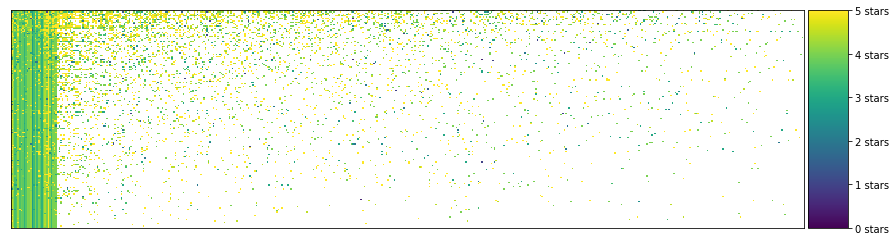

In [ ]:
cluster_number = 1
n_users = 300
n_movies = 1000
cluster = clustered[clustered.group == cluster_number].drop(['index', 'group'], axis=1)
cluster = sort_by_rating_density(cluster, n_movies, n_users)
draw_movies_heatmap(cluster, axis_labels=False)

In [ ]:
cluster

,Pulp Fiction (1994),Apocalypse Now (1979),True Lies (1994),Aladdin (1992),Fight Club (1999),Speed (1994),Rain Man (1988),"Lion King, The (1994)","Mask, The (1994)",X-Men (2000),Fargo (1996),Good Will Hunting (1997),Goodfellas (1990),Waterworld (1995),Outbreak (1995),Alien (1979),GoldenEye (1995),Forrest Gump (1994),Dances with Wolves (1990),Clueless (1995),"Fugitive, The (1993)","Usual Suspects, The (1995)","Silence of the Lambs, The (1991)","Shawshank Redemption, The (1994)",Jurassic Park (1993),Batman (1989),"Matrix, The (1999)",Apollo 13 (1995),Braveheart (1995),Star Wars: Episode IV - A New Hope (1977),Toy Story (1995),American Beauty (1999),Star Wars: Episode V - The Empire Strikes Back (1980),Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),Back to the Future (1985),Star Wars: Episode VI - Return of the Jedi (1983),"Godfather, The (1972)",Terminator 2: Judgment Day (1991),Monty Python and the Holy Grail (1975),Schindler's List (1993),...,Scarface (1983),Dracula (Bram Stoker's Dracula) (1992),"Crying Game, The (1992)","Time to Kill, A (1996)","Brady Bunch Movie, The (1995)",Rumble in the Bronx (Hont faan kui) (1995),Batman Returns (1992),Copycat (1995),"Remains of the Day, The (1993)",Searching for Bobby Fischer (1993),First Knight (1995),"Devil's Advocate, The (1997)",Donnie Brasco (1997),"Good Morning, Vietnam (1987)",Big Fish (2003),Witness (1985),Junior (1994),What's Eating Gilbert Grape (1993),Hot Shots! Part Deux (1993),"Talented Mr. Ripley, The (1999)",Rob Roy (1995),Last Action Hero (1993),Primal Fear (1996),So I Married an Axe Murderer (1993),"Hudsucker Proxy, The (1994)",Nine Months (1995),Sleepers (1996),Ronin (1998),Disclosure (1994),Wag the Dog (1997),"Specialist, The (1994)",Conspiracy Theory (1997),Moulin Rouge (2001),Rush Hour (1998),Nell (1994),I.Q. (1994),"Last of the Mohicans, The (1992)","Negotiator, The (1998)","Adventures of Priscilla, Queen of the Desert, The (1994)",Little Women (1994)
85,5.0,4.133621,4.000000,3.663855,4.23192,5.000000,3.853556,3.763228,4.000000,5.000000,4.000000,4.017442,4.180077,4.00000,3.428571,4.000000,5.00000,5.0,5.00000,4.000000,5.0,5.000000,4.0,5.0,5.0,5.00000,5.0,5.0,5.0,5.0,5.0,NaN,5.0,5.0,4.0,5.0,NaN,5.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,2.5,4.133621,3.523419,3.663855,4.00000,4.000000,4.500000,3.763228,2.000000,4.000000,3.000000,5.000000,3.000000,2.81749,3.428571,4.000000,3.43299,4.5,5.00000,4.500000,4.0,4.377919,1.0,5.0,3.5,4.50000,5.0,4.5,4.0,4.5,3.5,5.0,4.5,3.5,3.5,4.5,3.0,4.0,3.0,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,5.0,4.133621,4.000000,4.000000,5.00000,3.606329,3.853556,4.000000,3.269231,5.000000,4.500000,4.017442,4.180077,2.81749,3.428571,5.000000,3.43299,4.0,3.72449,3.261649,4.0,4.377919,5.0,5.0,4.0,5.00000,3.0,4.0,4.0,5.0,4.5,4.0,4.0,5.0,5.0,5.0,NaN,5.0,5.0,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,5.0,4.133621,3.523419,3.500000,4.23192,3.606329,5.000000,5.000000,3.000000,4.000000,4.000000,4.000000,4.000000,2.81749,3.428571,5.000000,3.43299,5.0,3.50000,3.261649,4.0,5.000000,5.0,5.0,2.5,3.00000,5.0,4.0,4.0,4.5,5.0,5.0,5.0,5.0,5.0,4.5,5.0,5.0,5.0,5.0,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,5.0,5.000000,3.523419,4.500000,4.50000,3.606329,4.500000,3.763228,3.269231,3.671206,5.000000,4.017442,4.180077,2.81749,3.428571,4.000000,3.43299,4.0,3.72449,4.000000,4.0,4.000000,4.5,5.0,4.0,3.40708,4.0,4.5,4.0,5.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
cluster.fillna('').head()

,Pulp Fiction (1994),Apocalypse Now (1979),True Lies (1994),Aladdin (1992),Fight Club (1999),Speed (1994),Rain Man (1988),"Lion King, The (1994)","Mask, The (1994)",X-Men (2000),Fargo (1996),Good Will Hunting (1997),Goodfellas (1990),Waterworld (1995),Outbreak (1995),Alien (1979),GoldenEye (1995),Forrest Gump (1994),Dances with Wolves (1990),Clueless (1995),"Fugitive, The (1993)","Usual Suspects, The (1995)","Silence of the Lambs, The (1991)","Shawshank Redemption, The (1994)",Jurassic Park (1993),Batman (1989),"Matrix, The (1999)",Apollo 13 (1995),Braveheart (1995),Star Wars: Episode IV - A New Hope (1977),Toy Story (1995),American Beauty (1999),Star Wars: Episode V - The Empire Strikes Back (1980),Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),Back to the Future (1985),Star Wars: Episode VI - Return of the Jedi (1983),"Godfather, The (1972)",Terminator 2: Judgment Day (1991),Monty Python and the Holy Grail (1975),Schindler's List (1993),...,Scarface (1983),Dracula (Bram Stoker's Dracula) (1992),"Crying Game, The (1992)","Time to Kill, A (1996)","Brady Bunch Movie, The (1995)",Rumble in the Bronx (Hont faan kui) (1995),Batman Returns (1992),Copycat (1995),"Remains of the Day, The (1993)",Searching for Bobby Fischer (1993),First Knight (1995),"Devil's Advocate, The (1997)",Donnie Brasco (1997),"Good Morning, Vietnam (1987)",Big Fish (2003),Witness (1985),Junior (1994),What's Eating Gilbert Grape (1993),Hot Shots! Part Deux (1993),"Talented Mr. Ripley, The (1999)",Rob Roy (1995),Last Action Hero (1993),Primal Fear (1996),So I Married an Axe Murderer (1993),"Hudsucker Proxy, The (1994)",Nine Months (1995),Sleepers (1996),Ronin (1998),Disclosure (1994),Wag the Dog (1997),"Specialist, The (1994)",Conspiracy Theory (1997),Moulin Rouge (2001),Rush Hour (1998),Nell (1994),I.Q. (1994),"Last of the Mohicans, The (1992)","Negotiator, The (1998)","Adventures of Priscilla, Queen of the Desert, The (1994)",Little Women (1994)
85,5.0,4.133621,4.000000,3.663855,4.23192,5.000000,3.853556,3.763228,4.000000,5.000000,4.0,4.017442,4.180077,4.00000,3.428571,4.0,5.00000,5.0,5.00000,4.000000,5.0,5.000000,4.0,5.0,5.0,5.00000,5.0,5.0,5.0,5,5,,5,5,4,5,,5,,5,...,,,,,,,4,,,,4,,,,,,,,,,4,,,,,,,,,,,5,,,,,,,,
143,2.5,4.133621,3.523419,3.663855,4.00000,4.000000,4.500000,3.763228,2.000000,4.000000,3.0,5.000000,3.000000,2.81749,3.428571,4.0,3.43299,4.5,5.00000,4.500000,4.0,4.377919,1.0,5.0,3.5,4.50000,5.0,4.5,4.0,4.5,3.5,5,4.5,3.5,3.5,4.5,3,4,3,4.5,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
113,5.0,4.133621,4.000000,4.000000,5.00000,3.606329,3.853556,4.000000,3.269231,5.000000,4.5,4.017442,4.180077,2.81749,3.428571,5.0,3.43299,4.0,3.72449,3.261649,4.0,4.377919,5.0,5.0,4.0,5.00000,3.0,4.0,4.0,5,4.5,4,4,5,5,5,,5,5,,...,,,,,4,,4,,,,,,,,,,,,,,,,,,4.5,,,,,,,,,,,,,,,
145,5.0,4.133621,3.523419,3.500000,4.23192,3.606329,5.000000,5.000000,3.000000,4.000000,4.0,4.000000,4.000000,2.81749,3.428571,5.0,3.43299,5.0,3.50000,3.261649,4.0,5.000000,5.0,5.0,2.5,3.00000,5.0,4.0,4.0,4.5,5,5,5,5,5,4.5,5,5,5,5,...,,5,,,,,,,,,,,,3,,,,,,,,5,,,,,,,,,,,,,,,,,,
51,5.0,5.000000,3.523419,4.500000,4.50000,3.606329,4.500000,3.763228,3.269231,3.671206,5.0,4.017442,4.180077,2.81749,3.428571,4.0,3.43299,4.0,3.72449,4.000000,4.0,4.000000,4.5,5.0,4.0,3.40708,4.0,4.5,4.0,5,5,,5,5,5,5,5,,5,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [ ]:
cluster.head()

,Pulp Fiction (1994),Apocalypse Now (1979),True Lies (1994),Aladdin (1992),Fight Club (1999),Speed (1994),Rain Man (1988),"Lion King, The (1994)","Mask, The (1994)",X-Men (2000),Fargo (1996),Good Will Hunting (1997),Goodfellas (1990),Waterworld (1995),Outbreak (1995),Alien (1979),GoldenEye (1995),Forrest Gump (1994),Dances with Wolves (1990),Clueless (1995),"Fugitive, The (1993)","Usual Suspects, The (1995)","Silence of the Lambs, The (1991)","Shawshank Redemption, The (1994)",Jurassic Park (1993),Batman (1989),"Matrix, The (1999)",Apollo 13 (1995),Braveheart (1995),Star Wars: Episode IV - A New Hope (1977),Toy Story (1995),American Beauty (1999),Star Wars: Episode V - The Empire Strikes Back (1980),Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),Back to the Future (1985),Star Wars: Episode VI - Return of the Jedi (1983),"Godfather, The (1972)",Terminator 2: Judgment Day (1991),Monty Python and the Holy Grail (1975),Schindler's List (1993),...,Scarface (1983),Dracula (Bram Stoker's Dracula) (1992),"Crying Game, The (1992)","Time to Kill, A (1996)","Brady Bunch Movie, The (1995)",Rumble in the Bronx (Hont faan kui) (1995),Batman Returns (1992),Copycat (1995),"Remains of the Day, The (1993)",Searching for Bobby Fischer (1993),First Knight (1995),"Devil's Advocate, The (1997)",Donnie Brasco (1997),"Good Morning, Vietnam (1987)",Big Fish (2003),Witness (1985),Junior (1994),What's Eating Gilbert Grape (1993),Hot Shots! Part Deux (1993),"Talented Mr. Ripley, The (1999)",Rob Roy (1995),Last Action Hero (1993),Primal Fear (1996),So I Married an Axe Murderer (1993),"Hudsucker Proxy, The (1994)",Nine Months (1995),Sleepers (1996),Ronin (1998),Disclosure (1994),Wag the Dog (1997),"Specialist, The (1994)",Conspiracy Theory (1997),Moulin Rouge (2001),Rush Hour (1998),Nell (1994),I.Q. (1994),"Last of the Mohicans, The (1992)","Negotiator, The (1998)","Adventures of Priscilla, Queen of the Desert, The (1994)",Little Women (1994)
85,5.0,4.133621,4.000000,3.663855,4.23192,5.000000,3.853556,3.763228,4.000000,5.000000,4.0,4.017442,4.180077,4.00000,3.428571,4.0,5.00000,5.0,5.00000,4.000000,5.0,5.000000,4.0,5.0,5.0,5.00000,5.0,5.0,5.0,5.0,5.0,NaN,5.0,5.0,4.0,5.0,NaN,5.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,2.5,4.133621,3.523419,3.663855,4.00000,4.000000,4.500000,3.763228,2.000000,4.000000,3.0,5.000000,3.000000,2.81749,3.428571,4.0,3.43299,4.5,5.00000,4.500000,4.0,4.377919,1.0,5.0,3.5,4.50000,5.0,4.5,4.0,4.5,3.5,5.0,4.5,3.5,3.5,4.5,3.0,4.0,3.0,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,5.0,4.133621,4.000000,4.000000,5.00000,3.606329,3.853556,4.000000,3.269231,5.000000,4.5,4.017442,4.180077,2.81749,3.428571,5.0,3.43299,4.0,3.72449,3.261649,4.0,4.377919,5.0,5.0,4.0,5.00000,3.0,4.0,4.0,5.0,4.5,4.0,4.0,5.0,5.0,5.0,NaN,5.0,5.0,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,5.0,4.133621,3.523419,3.500000,4.23192,3.606329,5.000000,5.000000,3.000000,4.000000,4.0,4.000000,4.000000,2.81749,3.428571,5.0,3.43299,5.0,3.50000,3.261649,4.0,5.000000,5.0,5.0,2.5,3.00000,5.0,4.0,4.0,4.5,5.0,5.0,5.0,5.0,5.0,4.5,5.0,5.0,5.0,5.0,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,5.0,5.000000,3.523419,4.500000,4.50000,3.606329,4.500000,3.763228,3.269231,3.671206,5.0,4.017442,4.180077,2.81749,3.428571,4.0,3.43299,4.0,3.72449,4.000000,4.0,4.000000,4.5,5.0,4.0,3.40708,4.0,4.5,4.0,5.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
cluster.shape

(170, 500)

In [ ]:
cluster.tail()

,Pulp Fiction (1994),Apocalypse Now (1979),True Lies (1994),Aladdin (1992),Fight Club (1999),Speed (1994),Rain Man (1988),"Lion King, The (1994)","Mask, The (1994)",X-Men (2000),Fargo (1996),Good Will Hunting (1997),Goodfellas (1990),Waterworld (1995),Outbreak (1995),Alien (1979),GoldenEye (1995),Forrest Gump (1994),Dances with Wolves (1990),Clueless (1995),"Fugitive, The (1993)","Usual Suspects, The (1995)","Silence of the Lambs, The (1991)","Shawshank Redemption, The (1994)",Jurassic Park (1993),Batman (1989),"Matrix, The (1999)",Apollo 13 (1995),Braveheart (1995),Star Wars: Episode IV - A New Hope (1977),Toy Story (1995),American Beauty (1999),Star Wars: Episode V - The Empire Strikes Back (1980),Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),Back to the Future (1985),Star Wars: Episode VI - Return of the Jedi (1983),"Godfather, The (1972)",Terminator 2: Judgment Day (1991),Monty Python and the Holy Grail (1975),Schindler's List (1993),...,Scarface (1983),Dracula (Bram Stoker's Dracula) (1992),"Crying Game, The (1992)","Time to Kill, A (1996)","Brady Bunch Movie, The (1995)",Rumble in the Bronx (Hont faan kui) (1995),Batman Returns (1992),Copycat (1995),"Remains of the Day, The (1993)",Searching for Bobby Fischer (1993),First Knight (1995),"Devil's Advocate, The (1997)",Donnie Brasco (1997),"Good Morning, Vietnam (1987)",Big Fish (2003),Witness (1985),Junior (1994),What's Eating Gilbert Grape (1993),Hot Shots! Part Deux (1993),"Talented Mr. Ripley, The (1999)",Rob Roy (1995),Last Action Hero (1993),Primal Fear (1996),So I Married an Axe Murderer (1993),"Hudsucker Proxy, The (1994)",Nine Months (1995),Sleepers (1996),Ronin (1998),Disclosure (1994),Wag the Dog (1997),"Specialist, The (1994)",Conspiracy Theory (1997),Moulin Rouge (2001),Rush Hour (1998),Nell (1994),I.Q. (1994),"Last of the Mohicans, The (1992)","Negotiator, The (1998)","Adventures of Priscilla, Queen of the Desert, The (1994)",Little Women (1994)
97,4.5,4.133621,3.523419,3.663855,5.00000,3.606329,3.853556,3.763228,3.269231,3.671206,4.052222,4.017442,4.180077,2.81749,3.428571,3.972789,3.43299,4.0,3.72449,3.261649,4.0,4.377919,4.0,5.0,4.0,3.40708,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,4.5,4.133621,3.523419,3.663855,4.23192,3.606329,3.853556,3.763228,3.269231,3.671206,4.052222,4.017442,4.180077,2.81749,3.428571,3.972789,3.43299,4.0,3.72449,3.261649,4.0,4.377919,4.0,5.0,4.0,3.40708,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,4.5,4.133621,3.523419,3.663855,4.23192,3.606329,3.853556,3.763228,3.269231,3.671206,4.052222,4.017442,4.180077,2.81749,3.428571,3.972789,3.43299,4.0,3.72449,3.261649,4.0,4.500000,4.0,5.0,4.0,3.40708,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,4.5,4.133621,3.523419,3.663855,4.23192,3.606329,3.853556,3.763228,3.269231,3.671206,4.052222,4.017442,4.180077,2.81749,3.428571,3.972789,3.43299,4.0,3.72449,3.261649,4.0,4.377919,4.0,5.0,4.0,3.40708,4.0,4.0,4.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,4.5,5.000000,3.523419,3.663855,4.50000,3.606329,3.853556,3.763228,3.269231,3.671206,4.052222,4.017442,4.180077,2.81749,3.428571,3.972789,3.43299,4.0,3.72449,3.261649,4.0,4.000000,4.0,5.0,4.0,3.40708,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
movie_name = "Speed (1994)"
cluster[movie_name].mean()

3.6719806403574164

In [ ]:
cluster.mean().head(20)

Pulp Fiction (1994)          4.423529
Apocalypse Now (1979)        4.177510
True Lies (1994)             3.613955
Aladdin (1992)               3.730985
Fight Club (1999)            4.260129
Speed (1994)                 3.671981
Rain Man (1988)              3.911100
Lion King, The (1994)        3.843869
Mask, The (1994)             3.322624
X-Men (2000)                 3.737285
Fargo (1996)                 4.106967
Good Will Hunting (1997)     4.030711
Goodfellas (1990)            4.160773
Waterworld (1995)            2.860859
Outbreak (1995)              3.457983
Alien (1979)                 4.065666
GoldenEye (1995)             3.466161
Forrest Gump (1994)          4.164706
Dances with Wolves (1990)    3.826351
Clueless (1995)              3.315444
dtype: float64

In [ ]:
# Pick a user ID from the dataset
userId = 7

# Get all this user's ratings
user_2_ratings  = cluster.loc[userId , :]

# Which movies did they not rate? 
user_2_unrated_movies =  user_2_ratings[user_2_ratings.isnull()]

avg_ratings = pd.concat([user_2_unrated_movies, cluster.mean()], axis=1, join='inner').loc[:,0]

# highest rated movies are presented first
avg_ratings.sort_values(ascending=False)[:20]

Remains of the Day, The (1993)                                               5.000000
Fantasia (1940)                                                              5.000000
Last of the Mohicans, The (1992)                                             5.000000
Tombstone (1993)                                                             5.000000
Nell (1994)                                                                  5.000000
Big Fish (2003)                                                              5.000000
Chasing Amy (1997)                                                           5.000000
Postman, The (Postino, Il) (1994)                                            4.954545
Christmas Story, A (1983)                                                    4.923077
Some Like It Hot (1959)                                                      4.916667
Mulholland Drive (2001)                                                      4.900000
Lawrence of Arabia (1962)                             